In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import pygwalker as pyg
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("oasis_longitudinal.csv")
print(df.shape)
df.head()

(373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


As we have dataset of clinical sector.

### Now we to do Data cleaning 

In [3]:
df = df.drop(['Subject ID', 'MRI ID'], axis=1)

In [4]:
df.isna().sum()/len(df)*100

Group       0.000000
Visit       0.000000
MR Delay    0.000000
M/F         0.000000
Hand        0.000000
Age         0.000000
EDUC        0.000000
SES         5.093834
MMSE        0.536193
CDR         0.000000
eTIV        0.000000
nWBV        0.000000
ASF         0.000000
dtype: float64

As we can see SES & MMSE has missing values.

In [5]:
df['SES'].value_counts()

2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

In [6]:
df['SES'].median()

2.0

In [7]:
df['SES'] = df['SES'].fillna(2.0)

In [8]:
df['MMSE'].value_counts()

30.0    114
29.0     91
28.0     45
27.0     32
26.0     20
25.0     12
21.0     11
23.0     11
22.0      7
20.0      7
17.0      5
24.0      4
16.0      3
19.0      3
15.0      2
18.0      2
7.0       1
4.0       1
Name: MMSE, dtype: int64

In [9]:
df['MMSE'].median()

29.0

In [10]:
df['MMSE'] = df['MMSE'].fillna(29.0)

In [11]:
df.isna().sum()/len(df)*100

Group       0.0
Visit       0.0
MR Delay    0.0
M/F         0.0
Hand        0.0
Age         0.0
EDUC        0.0
SES         0.0
MMSE        0.0
CDR         0.0
eTIV        0.0
nWBV        0.0
ASF         0.0
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    object 
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   M/F       373 non-null    object 
 4   Hand      373 non-null    object 
 5   Age       373 non-null    int64  
 6   EDUC      373 non-null    int64  
 7   SES       373 non-null    float64
 8   MMSE      373 non-null    float64
 9   CDR       373 non-null    float64
 10  eTIV      373 non-null    int64  
 11  nWBV      373 non-null    float64
 12  ASF       373 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 38.0+ KB


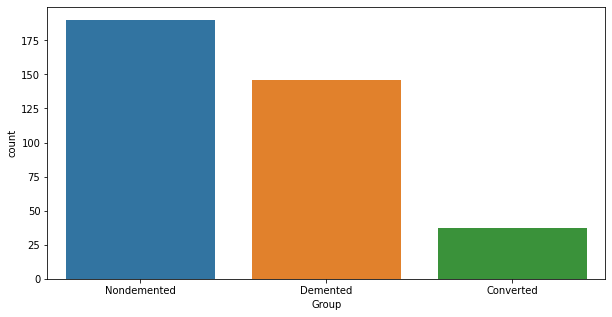

In [13]:
sns.countplot(x='Group', data=df)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

### Due to the fact that we are trying to predict if a subject has alzheimer's dementia or not,
### the target column can only be demented or no-demented. Therefore, we need to remove the converted group 
### class as it wont fit in neither result.

In [14]:
df['Group'] = df['Group'].astype('category')

In [15]:
df['Group'] = df['Group'].cat.remove_categories('Converted')

In [16]:
df.isna().sum()/len(df)*100

Group       9.919571
Visit       0.000000
MR Delay    0.000000
M/F         0.000000
Hand        0.000000
Age         0.000000
EDUC        0.000000
SES         0.000000
MMSE        0.000000
CDR         0.000000
eTIV        0.000000
nWBV        0.000000
ASF         0.000000
dtype: float64

In [17]:
df['Group'].mode()

0    Nondemented
Name: Group, dtype: category
Categories (2, object): ['Demented', 'Nondemented']

In [18]:
df['Group'] = df['Group'].fillna('Nondemented')

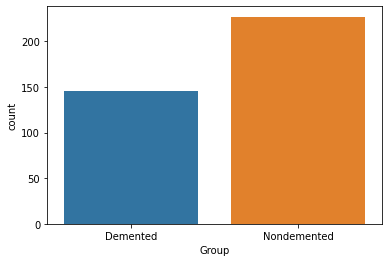

In [19]:
sns.countplot(x='Group', data=df)
fig.set_size_inches(5,5)
plt.show()

In [20]:
df['Group'].value_counts()

Nondemented    227
Demented       146
Name: Group, dtype: int64

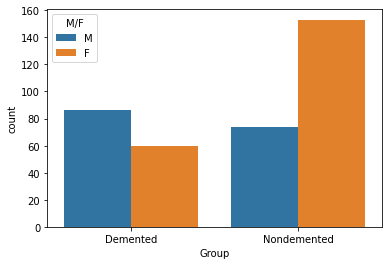

In [21]:
sns.countplot(x='Group', hue='M/F', data=df)
fig.set_size_inches(15,5)
plt.show()

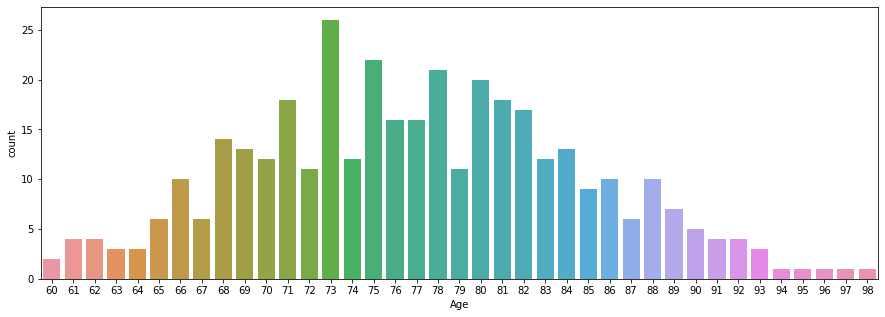

In [22]:
sns.countplot(x='Age', data=df)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.show()

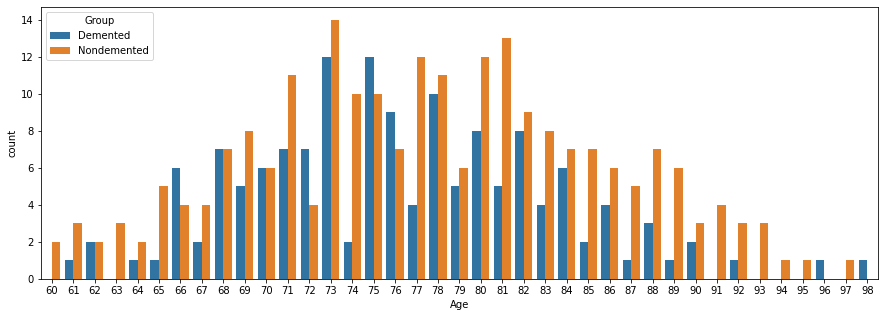

In [23]:
sns.countplot(x='Age', hue='Group', data=df)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.show()

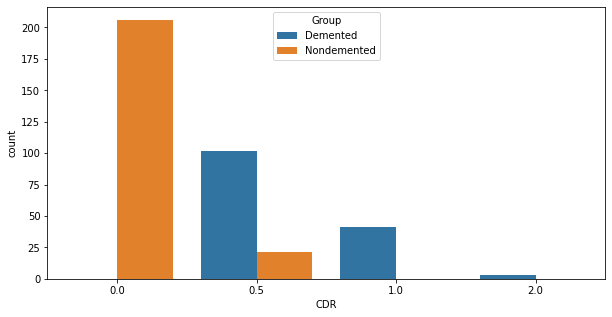

In [24]:
sns.countplot(x='CDR', hue='Group', data=df)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

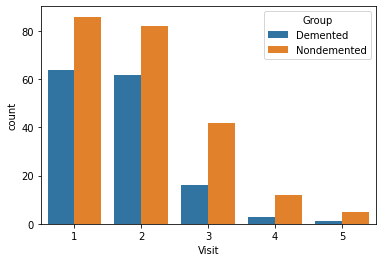

In [25]:
sns.countplot(x='Visit', hue='Group', data=df)
fig.set_size_inches(10,5)
plt.show()

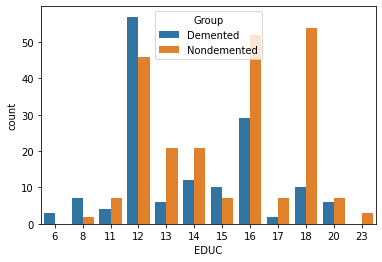

In [26]:
sns.countplot(x='EDUC', hue='Group', data=df)
fig.set_size_inches(10,5)
plt.show()

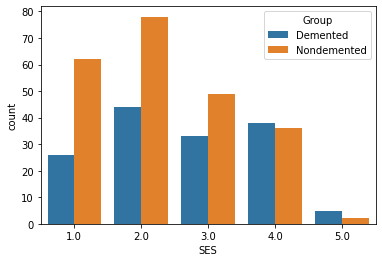

In [27]:
sns.countplot(x='SES', hue='Group', data=df)
fig.set_size_inches(10,5)
plt.show()

In [28]:
df.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [29]:
df['Hand'].value_counts()

R    373
Name: Hand, dtype: int64

In [30]:
df = df.drop(['Hand'], axis=1)

In [31]:
df['M/F'] = df['M/F'].astype('category')
df['M/F'] = df['M/F'].cat.codes

In [32]:
df = pd.get_dummies(df, columns = ['M/F'])

In [33]:
df.columns

Index(['Group', 'Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR',
       'eTIV', 'nWBV', 'ASF', 'M/F_0', 'M/F_1'],
      dtype='object')

In [34]:
df = df.drop(['M/F_0'], axis=1)

In [35]:
df.head()

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_1
0,Nondemented,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1
1,Nondemented,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,1
2,Demented,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,Demented,2,560,76,12,2.0,28.0,0.5,1738,0.713,1.010,1
4,Demented,3,1895,80,12,2.0,22.0,0.5,1698,0.701,1.034,1


In [36]:
Cluster = df.groupby('Group').mean()
Cluster['Freq.'] = df['Group'].value_counts().sort_index()

In [37]:
Cluster

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_1,Freq.
Group,,,,,,,,,,,,
Demented,1.732877,452.541096,76.260274,13.671233,2.671233,24.575342,0.671233,1485.849315,0.716301,1.196890,0.589041,146
Nondemented,1.977974,686.797357,77.497797,15.193833,2.286344,29.136564,0.046256,1489.594714,0.738101,1.194542,0.325991,227


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,373.0,2.436997,1.109307,1.000,2.000,2.000,3.000,5.000
MMSE,373.0,27.351206,3.675329,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [39]:
df['Group'] = df['Group'].astype('category')
df['Group'] = df['Group'].cat.codes

In [40]:
df.head()

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_1
0,1,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1
1,1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,1
2,0,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,0,2,560,76,12,2.0,28.0,0.5,1738,0.713,1.010,1
4,0,3,1895,80,12,2.0,22.0,0.5,1698,0.701,1.034,1


<AxesSubplot:>

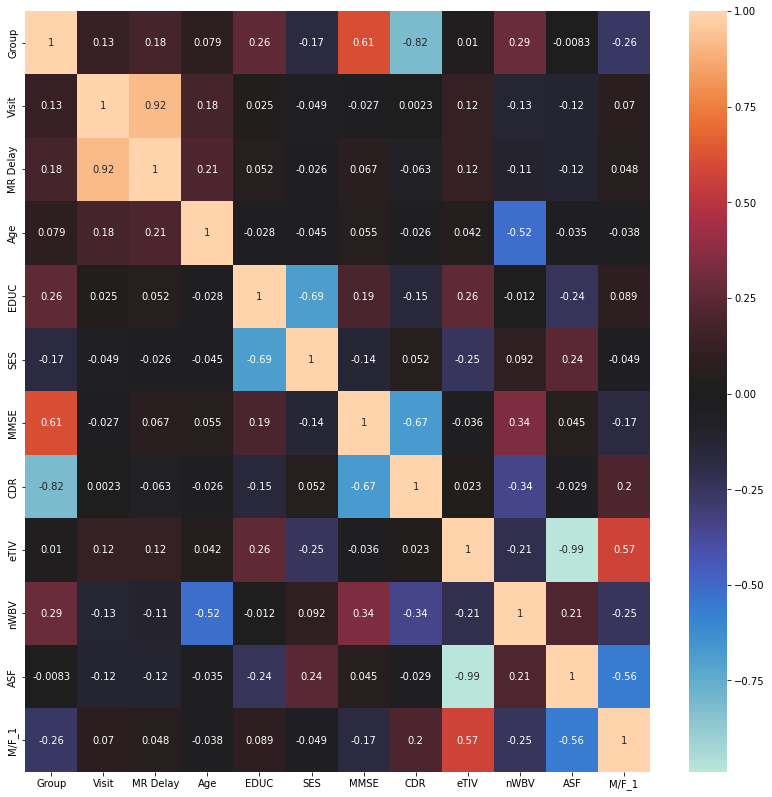

In [41]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, center=0)

In [42]:
df = df.drop(['ASF', 'MMSE'], axis=1)

In [43]:
x = df.drop(['Group'], axis=1)
y = df['Group']

In [44]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
x = Scaler.fit_transform(x)

In [45]:
df_feat = pd.DataFrame(x, columns = df.columns[1:])
df_feat.head()

,Visit,MR Delay,Age,EDUC,SES,CDR,eTIV,nWBV,M/F_1
0,0.00,0.000000,0.710526,0.470588,0.25,0.00,0.981069,0.269430,1.0
1,0.25,0.173172,0.736842,0.470588,0.25,0.00,1.000000,0.191710,1.0
2,0.00,0.000000,0.394737,0.352941,0.25,0.25,0.636971,0.476684,1.0
3,0.25,0.212202,0.421053,0.352941,0.25,0.25,0.703786,0.357513,1.0
4,0.50,0.718075,0.526316,0.352941,0.25,0.25,0.659243,0.295337,1.0


In [46]:
x = df_feat
y = df['Group']

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(279, 9)
(94, 9)
(279,)
(94,)


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

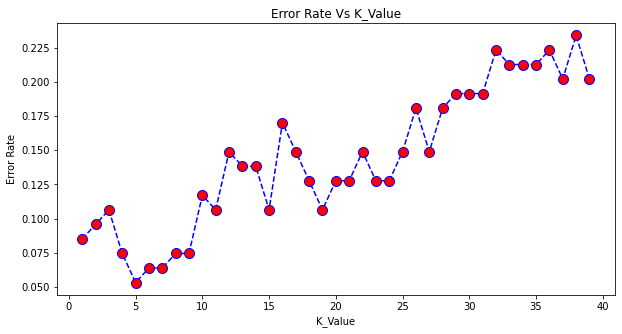

In [50]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle='dashed', marker='o',
        markerfacecolor = 'red', markersize=10)
plt.title("Error Rate Vs K_Value")
plt.xlabel("K_Value")
plt.ylabel("Error Rate")
plt.show()

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
print(accuracy_score(y_train, y_pred_train))
print("-"*30)
print(accuracy_score(y_test, y_pred_test))

0.946236559139785
------------------------------
0.9468085106382979


In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)

In [57]:
print(accuracy_score(y_train, y_pred_train_dt))
print("-"*30)
print(accuracy_score(y_test, y_pred_test_dt))

1.0
------------------------------
0.9574468085106383


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [60]:
print(accuracy_score(y_train, y_pred_train_rf))
print("-"*30)
print(accuracy_score(y_test, y_pred_test_rf))

1.0
------------------------------
0.9680851063829787
